In [747]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [748]:
DATASET_PATH_TRAIN = 'train.csv'
DATASET_PATH_TEST = 'test.csv'

In [749]:
df = pd.read_csv(DATASET_PATH_TRAIN, sep=',')

In [750]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [751]:
df = df.fillna(0)

df.loc[(df['Square'] < 10), 'Square'] = df['Square'].median()
df.loc[(df['LifeSquare'] < 10), 'LifeSquare'] = df['LifeSquare'].median()

df.loc[(df['LifeSquare'] > df['Square']), 'LifeSquare'] = df['Square']

df.loc[((df['KitchenSquare'] > df['LifeSquare']*0.3) | (df['KitchenSquare'] < 4)), 'KitchenSquare'] = df['KitchenSquare'].median()

df = pd.concat([df, pd.get_dummies(df['Ecology_2'], prefix='Ecology_2', dtype='int8')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Ecology_3'], prefix='Ecology_3', dtype='int8')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Shops_2'], prefix='Shops_2', dtype='int8')], axis=1)

#df['HouseYear'] = df['HouseYear'] // 5 * 5

#for feat in ['DistrictId', 'Rooms','Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear','Social_1','Social_2','Social_3','Healthcare_1', 'Helthcare_2', 'Shops_1']:
#    df[feat] = (df[feat] - df[feat].min()) / (df[feat].max() - df[feat].min())

df['Price'] = df['Price'] // 5000 * 5000

#df.drop(['Id', 'Ecology_2', 'Ecology_3', 'Shops_2'], axis=1)

#df.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1)

In [752]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.374350,35.075886,6.711200,8.526700,12.609400,3.990166e+03,0.118858,...,594.538900,1.319500,4.231300,211649.500000,0.009700,0.990300,0.027500,0.972500,0.082500,0.917500
std,4859.01902,43.587592,0.839512,20.979981,16.875729,1.777726,5.241148,6.775974,2.005003e+05,0.119025,...,932.112976,1.493601,4.806341,92869.231283,0.098015,0.098015,0.163543,0.163543,0.275139,0.275139
min,0.00000,0.000000,0.000000,13.784865,10.523868,4.000000,1.000000,0.000000,1.910000e+03,0.000000,...,0.000000,0.000000,0.000000,55000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.794392,27.619654,6.000000,4.000000,9.000000,1.974000e+03,0.017647,...,0.000000,0.000000,1.000000,150000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.513580,28.926861,6.000000,7.000000,13.000000,1.977000e+03,0.075424,...,30.000000,1.000000,3.000000,190000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12592.50000,75.000000,2.000000,65.900625,41.178370,7.000000,12.000000,17.000000,2.001000e+03,0.195781,...,990.000000,2.000000,6.000000,245000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16798.00000,209.000000,19.000000,641.065193,638.163193,30.000000,42.000000,117.000000,2.005201e+07,0.521867,...,4849.000000,6.000000,23.000000,630000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [753]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
Ecology_2_A         int8
Ecology_2_B         int8
Ecology_3_A         int8
Ecology_3_B         int8
Shops_2_A           int8
Shops_2_B           int8
dtype: object

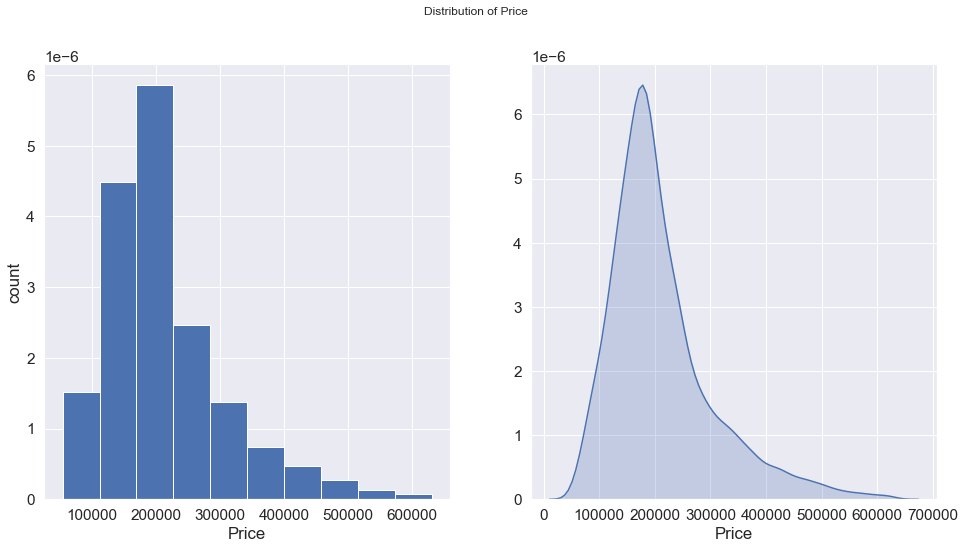

In [754]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist(density=True)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

In [755]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()
target_mode = df['Price'].mode()[0]

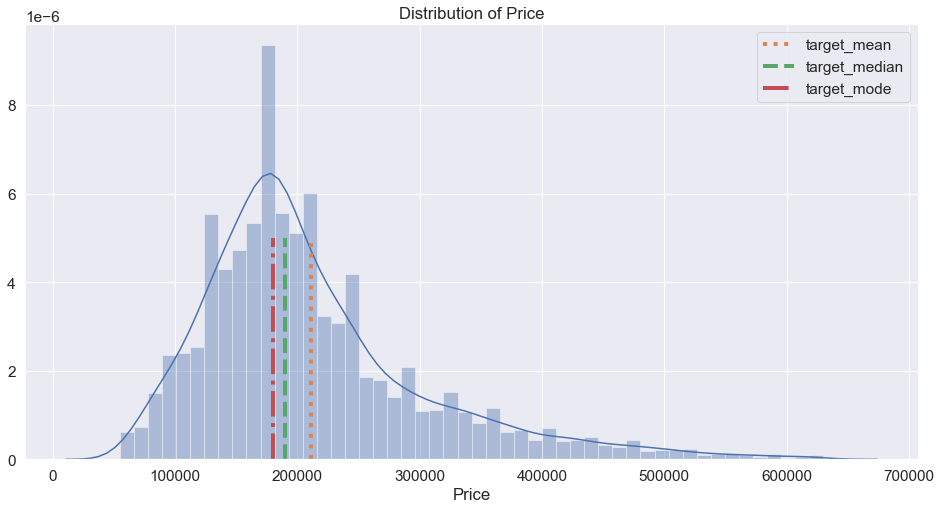

In [756]:
plt.figure(figsize = (16, 8))

sns.distplot(df['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='target_mean', linestyle=':',  linewidth=4)
plt.plot([target_median] * 10, y, label='target_median', linestyle='--',  linewidth=4)
plt.plot([target_mode] * 10, y, label='target_mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

In [757]:
df_num_features = df.select_dtypes(include=['float64', 'int64', 'int8'])
df_num_features.drop('Price', axis=1, inplace=True)

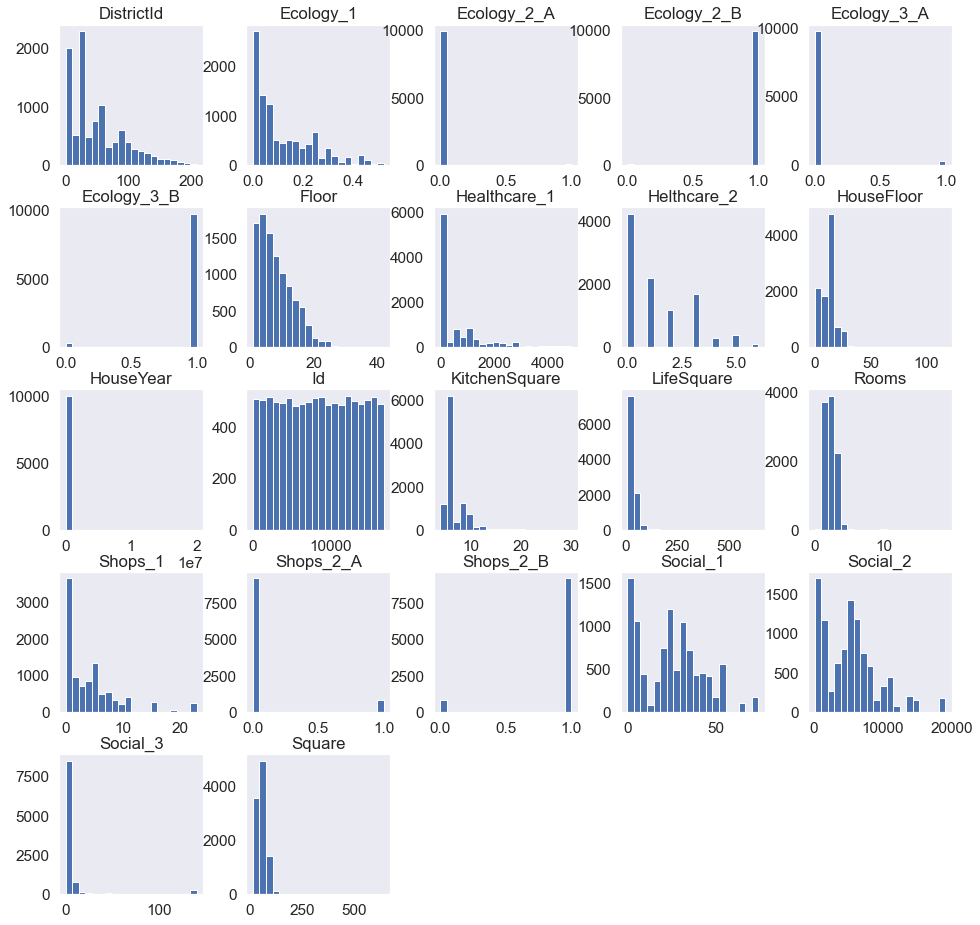

In [758]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

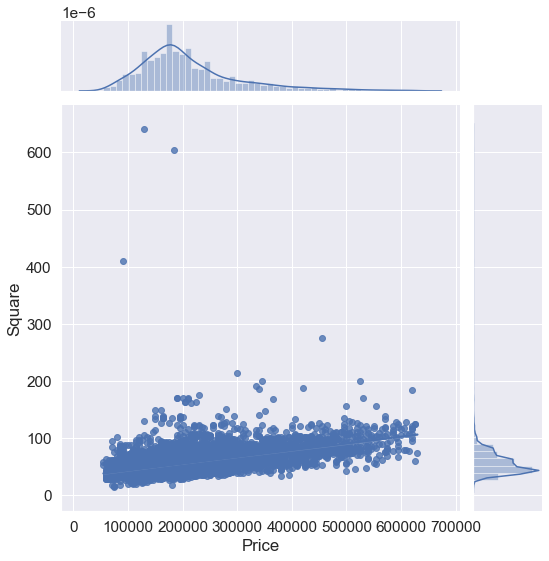

In [759]:
grid = sns.jointplot(df['Price'], df['Square'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

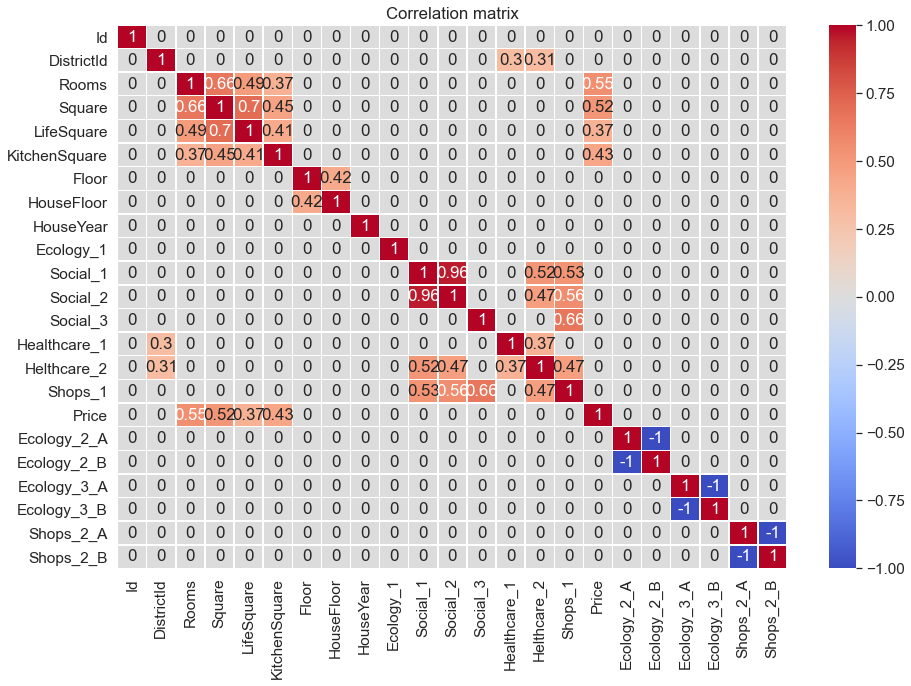

In [760]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

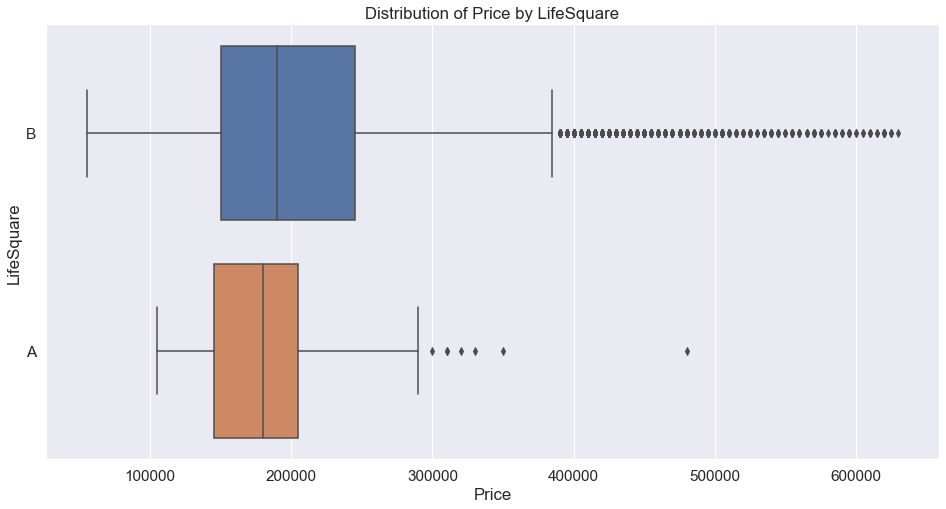

In [761]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['Price'], df['Ecology_2'])

plt.xlabel('Price')
plt.ylabel('LifeSquare')
plt.title('Distribution of Price by LifeSquare')
plt.show()

In [762]:
X = df.select_dtypes(include=['float64', 'int64', 'int8'])
X.drop(['Id','Price'], axis=1, inplace=True)
X

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,...,5,0.0,0,11,0,1,0,1,0,1
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,...,1,240.0,1,16,0,1,0,1,0,1
2,53,2.0,44.947953,29.197612,6.0,8,12.0,1968,0.049637,34,...,0,229.0,1,3,0,1,0,1,0,1
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,...,3,1084.0,0,5,0,1,0,1,0,1
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,...,1,2078.0,2,4,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,46,...,6,350.0,3,11,0,1,0,1,0,1
9996,18,1.0,41.521546,20.539216,6.0,13,13.0,2000,0.000000,30,...,0,0.0,0,5,0,1,0,1,1,0
9997,27,1.0,47.939008,28.926861,6.0,12,16.0,2015,0.072158,2,...,1,0.0,0,0,0,1,0,1,1,0
9998,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,30,...,9,325.0,2,5,0,1,1,0,0,1


In [763]:
y = pd.DataFrame(df, columns=["Price"])
y

,Price
0,180000.0
1,300000.0
2,220000.0
3,175000.0
4,150000.0
...,...
9995,195000.0
9996,185000.0
9997,155000.0
9998,180000.0


In [764]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [765]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [766]:
y_pred = lr.predict(X_test)

In [767]:
check_test = pd.DataFrame({
    "y_test": y_test["Price"],
    "y_pred": y_pred.flatten(),
})

check_test.head(10)

,y_test,y_pred
5389,195000.0,187601.433118
1187,180000.0,183765.586257
1945,140000.0,113667.122844
1430,165000.0,141485.143288
4113,115000.0,119912.057245
2568,215000.0,203719.131507
4978,125000.0,128278.088948
7479,270000.0,268337.302225
8722,500000.0,287877.629592
9882,140000.0,157461.669682


In [768]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]

check_test.head()

,y_test,y_pred,error
5389,195000.0,187601.433118,-7398.566882
1187,180000.0,183765.586257,3765.586257
1945,140000.0,113667.122844,-26332.877156
1430,165000.0,141485.143288,-23514.856712
4113,115000.0,119912.057245,4912.057245


In [769]:
r2_1 = r2_score(check_test["y_test"], check_test["y_pred"])
r2_1

-1396.647006453268

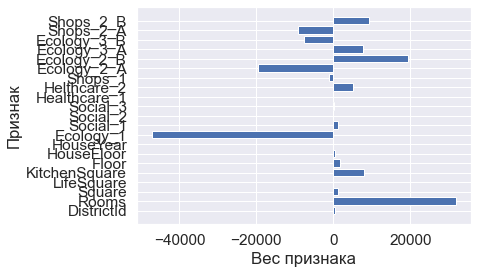

In [770]:
feature_names = list(X)

plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [771]:
X_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000,...,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,50.431600,1.884133,56.252408,35.003532,6.694667,8.50120,12.598667,1985.253867,0.118488,24.704800,...,8.160800,594.486533,1.315467,4.225067,0.009600,0.990400,0.027733,0.972267,0.082933,0.917067
std,43.736226,0.844987,21.607804,17.389189,1.789823,5.21186,6.718047,39.078242,0.118638,17.462483,...,24.083322,937.028188,1.490048,4.814883,0.097515,0.097515,0.164219,0.164219,0.275800,0.275800
min,0.000000,0.000000,13.784865,10.523868,4.000000,1.00000,0.000000,1910.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,41.697834,27.275973,6.000000,4.00000,9.000000,1974.000000,0.017647,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,35.000000,2.000000,52.323724,28.926861,6.000000,7.00000,12.000000,1977.000000,0.075424,25.000000,...,2.000000,30.000000,1.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,75.000000,2.000000,65.757948,40.974504,7.000000,12.00000,17.000000,2001.000000,0.195781,36.000000,...,5.000000,1015.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,209.000000,19.000000,641.065193,638.163193,30.000000,37.00000,99.000000,4968.000000,0.521867,74.000000,...,141.000000,4849.000000,6.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [772]:
scaler = StandardScaler()

In [773]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

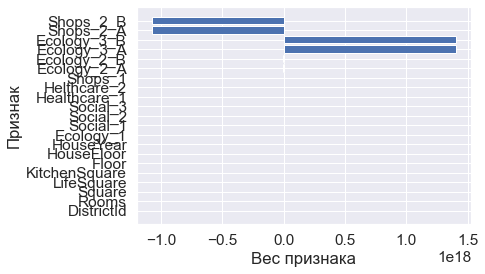

In [774]:
lr.fit(X_train_scaled, y_train)

plt.barh(feature_names, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [775]:
important_features = [
    feature
    for feature, weight in zip(feature_names, lr.coef_.flatten())
    if np.abs(weight) > 0.5
]

print(important_features)

['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']


In [776]:
lr.fit(
    X_train_scaled.loc[:, important_features],
    y_train
)

y_pred = lr.predict(X_test_scaled.loc[:, important_features])

r2_2 = r2_score(y_test, y_pred)

print("mse до: {}".format(r2_1))
print("mse после: {}".format(r2_2))

mse до: -1396.647006453268
mse после: 0.5232394819242887


In [777]:
from sklearn.linear_model import Lasso, Ridge

model = Lasso(alpha=0.03)

model.fit(X_train_scaled.loc[:, important_features], y_train)

y_pred = model.predict(X_test_scaled.loc[:, important_features])

mean_squared_error(y_test, y_pred)

4178955379.6449385

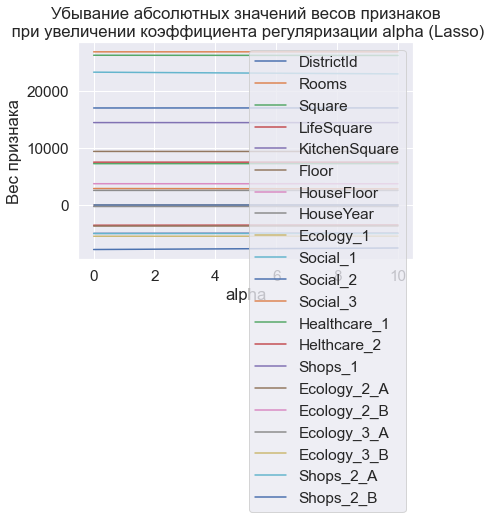

In [778]:
n = 50

coeffs = np.zeros((n, len(important_features)))
alpha_list = np.logspace(-3, 1, n)

for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha=val)
    lasso.fit(X_train_scaled.loc[:, important_features], y_train)
    
    coeffs[i, :] = lasso.coef_.flatten()

for i in range(len(important_features)):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')

plt.xlabel('alpha')
plt.ylabel('Вес признака')

plt.legend(important_features)